# Simple-Feature Detection

In [1]:
import pandas as pd
import plotly.express as px
import math

# 2 lines below for html export
import plotly.io as pio
pio.renderers.default ='notebook'

# 2 lines below for PDF export
#!pip install Pyppeteer
#!pyppeteer-install

from IPython.display import YouTubeVideo

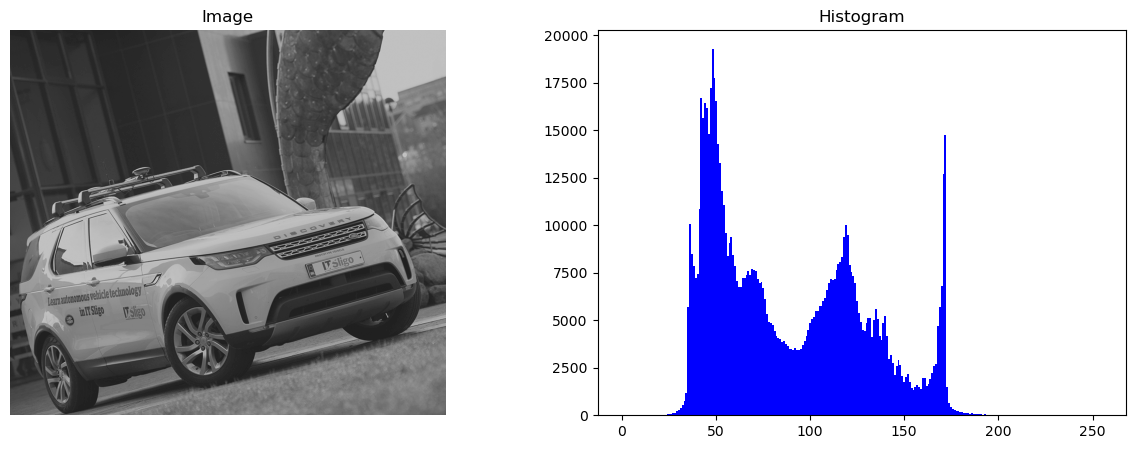

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
# Function to create and display a histogram beside the original image
def display_image_histogram(img):
       
    
    # Create a histogram for the image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Display the image
    ax1.imshow(img, cmap='gray')
    ax1.set_title('Image')
    ax1.axis('off')  # Hide axes as this is just an image not a graph
    
    # Display the histogram
    ax2.hist(img.flatten(), bins=256, range=(0,255), color='blue')
    ax2.set_title('Histogram')
    
    # Show the plot
    plt.show()
    


# Open the image file
img = cv2.imread('images/CAV15LowContrast.jpg', cv2.IMREAD_GRAYSCALE)
display_image_histogram(img)  

## Links and Acknowledgements

[Mubarak Shah, University of Central Florida (UCF), Youtube](https://www.youtube.com/watch?v=715uLCHt4jE&list=PLd3hlSJsX_ImKP68wfKZJVIPTd8Ie5u-9)

[James, Hays Georgia Tech, Notes](https://www.cc.gatech.edu/~hays/compvision/)

[Richard Szeliski, Computer Vision, Text Book](https://www.amazon.co.uk/Computer-Vision-Algorithms-Applications-Science/dp/1848829345/ref=sr_1_1?ie=UTF8&qid=1548753076&sr=8-1&keywords=richard+szeliski)

[Tamal Bose, Digital Signal and Image Processing, Text Book](https://www.amazon.co.uk/Digital-Signal-Image-Processing-Tamal/dp/9812531122/ref=sr_1_1?ie=UTF8&qid=1548753160&sr=8-1&keywords=digital+signal+and+image+processing+tamal+bose)

[David Jerison, MIT 18.01 Single Variable Calculus, Youtube](https://www.youtube.com/watch?v=7K1sB05pE0A&list=PL590CCC2BC5AF3BC1)

[Gilbert Strang, MIT 18.06 Linear Algebra, Youtube](https://www.youtube.com/watch?v=ZK3O402wf1c&list=PLE7DDD91010BC51F8)




## Edges

Edges in images convey an enormous amount of information. 

A line drawing of an image contains most of the information you need. 

Adding grey tones, colour and texture should not be underestimated but edges tell us the most.
They delineate the boundary between objects.

They also show where an object changes. 

We can also see shadow boundaries which may help with determining positions in an image.

Edge detection is well studied with incremental improvement being made from one algorithm to the next.

## Types of edge

To think about edges you need to think about a change in the brightness (intensity) of pixels.
This could be a change from bright to dark or dark to bright. Below are four types of edge model. Low values are dark and high values are bright.

!['The image illustrates four types of edges commonly identified in image processing, each accompanied by a corresponding graphical representation. "Step": Displayed is a horizontal line with a sudden vertical change, resembling a step. "Roof": Illustrated is a line that gradually ascends and then immediately descends, forming a shape similar to a roof. "Ramp": Showcased is a line that smoothly ascends, resembling a ramp. "Spike": Depicted is a line with a sharp and narrow peak, representing a spike.
Each type of edge is a different graphical representation of intensity transitions that might be encountered in an image.'](images/TypesOfEdge.jpeg)

Once we mention change of brightness you should immediately think gradient/derivative.
The gradient will pop up again and again throughout your studies.

## Roberts Cross
Lawrence Roberts (1963)
 
Approximated the gradient of an image through discrete differentiation by computing the sum of squares of the differences between diagonally adjacent pixels. 
Start with Image $I(x,y)$
Convolve with the following two kernels to get $G_x(x,y)$ and $G_y(x,y)$
\begin{equation}
	G_x(x,y) = I(x,y)*\begin{bmatrix}
               1 & 0\\
               0 & -1    \\
            \end{bmatrix}
\end{equation}

\begin{equation}
	G_y(x,y) = I(x,y)*\begin{bmatrix}
               0 & 1\\
               -1 & 0  \\  
            \end{bmatrix}
\end{equation}


The magnitude of the gradient is given by 
\begin{equation}
	\nabla I(x,y) = g(x,y) = \sqrt{G_x^2+G_y^2}
\end{equation}

\begin{equation}
	\theta(x,y) = \tan^{-1}\left(\frac{G_y(x,y)}{G_x(x,y)}\right)-\frac{3\pi}{4}
\end{equation}

The angle $0^o$ corresponds to a vertical orientation such that the direction of maximum contrast from black to white runs from left to right in the image.
Roberts cross is simple and very fast to execute.
However it is rarely used now because it operates very poorly in the presence of noise.

This is what our next operator tries to fix.

In [ ]:
def convolve_image(image, kernel, delta=0):
    
    # Perform the convolution
    convolved_image = cv2.filter2D(image, -1, kernel, delta=delta)
    
    return convolved_image


def roberts_cross(img):
    roberts_cross1 = np.array([[1,0],
                         [0,-1]])
    roberts_cross2 = np.array([[0,1],
                         [-1,0]])
    r1 = convolve_image(img, roberts_cross1, delta=0) 
    r2 = convolve_image(img, roberts_cross1, delta=0) 
    
    output = np.uint8(np.sqrt(r1**2+r2**2))
    print(output)
    return output


def prewitt(img):
    prewitt1 = np.array([[ 1, 1, 1],
                    [ 0,  0, 0],
                    [ -1, -1, -1]])
    prewitt2 = np.array([[ 1, 0, -1],
                    [ 1,  0, -1],
                    [ 1, 0, -1]])
    p1 = convolve_image(img, prewitt1, delta=0) 
    p2 = convolve_image(img, prewitt2, delta=0) 
    
    output = np.uint8(np.sqrt(p1**2+p2**2))
    
    return output    

def sobel(img):
    sobel1 = np.array([[ 1, 2, 1],
                    [ 0,  0, 0],
                    [ -1, -2, -1]])
    sobel2 = np.array([[ 1, 0, -1],
                    [ 2,  0, -2],
                    [ 1, 0, -1]])
    s1 = convolve_image(img, sobel1, delta=0) 
    s2 = convolve_image(img, sobel2, delta=0) 
    
    output = np.uint8(np.sqrt(s1**2+s2**2))
    
    return output    


def marr_hildreth_edge_detection(img, threshold=10):
    # Apply Gaussian blur
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply Laplacian of Gaussian
    log_img = cv2.Laplacian(blurred_img, cv2.CV_64F, ksize=5)

    # Find zero crossings (edges)
    
    print(f'Max number after Laplacian: {np.max(log_img)})
    print(f'Min number after Laplacian: {np.min(log_img)})
    
    edges = np.zeros_like(log_img)
    for i in range(log_img.shape[0] - 1):
        for j in range(log_img.shape[1] - 1):
            if log_img[i-1][j] * log_img[i+1][j] < 0:
                if (abs(log_img[i-1][j] - log_img[i+1][j])  > threshold):
                    edges[i][j] = 255
            elif log_img[i][j-1] * log_img[i][j+1] < 0:
                if (abs(log_img[i][j-1] * log_img[i][j+1]) > threshold ):
                    edges[i][j] = 255
                    

    return edges

def add_gaussian_noise(image, mean=0, sigma=25):
    
    # Generate Gaussian noise
    noise = np.random.normal(mean, sigma, image.shape)
    
    # Add the noise to the image
    noisy_image = image+noise
    noisy_image[noisy_image<0]=0
    noisy_image[noisy_image>255]=255
    noisy_image = noisy_image.astype('uint8')
    
    
    
    return noisy_image



# Define a 3x3 kernel, for example, a Laplacian kernel
lap_kernel = np.array([[ -1.0, -1.0, -1.0],
                       [ -1.0,  8.0, -1.0],
                       [ -1.0, -1.0, -1.0]])
box_kernel = (1/9.0)*np.array([[ 1, 1, 1],
                               [ 1,  1, 1],
                               [ 1, 1, 1]])


# Define a 5x5 kernel, for example, a Gaussian kernel
gaussian_kernel_5x5 = (1/256.0)*np.array([[ 1, 4, 6, 4, 1],
                                        [ 4, 16, 24, 16, 4],
                                        [ 6, 24, 36, 24, 6],
                                        [4, 16, 24, 16, 4],
                                        [ 1, 4, 6, 4, 1]])



# Path to your image
image_path = "images/CAV15LowContrast.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
noisy_image = add_gaussian_noise(img, mean=0, sigma=25)

# Get the convolved image
convolved_img = convolve_image(noisy_image, prewitt1, delta=127) 
#test what happens if you leave out the delta or set the delta to zero
print("Original Image")
display_image_histogram(img)
#print("Noisy Image")
#display_image_histogram(noisy_image)
print('Roberts Cross')
roberts_image = roberts_cross(img)
display_image_histogram(roberts_image) 

print("Prewitt Image")
prewitt_image = prewitt(img) 
display_image_histogram(prewitt_image) 
print("Sobel Image")
sobel_image = sobel(img) 
display_image_histogram(sobel_image)
print("Marr-Hildreth")
threshold = 2000
MH_image = marr_hildreth_edge_detection(img, threshold)
display_image_histogram(MH_image)
print("Canny Edge")
threshold1 = 300
threshold2 = 500
Canny_image = cv2.Canny(img, threshold1, threshold2)
display_image_histogram(Canny_image)


## Prewitt and Sobel
It may seem counter intuitive but these operators use a Gaussian filter to smooth the image before looking for edges. 

The Gaussian filter is great at smoothing noise as the noise tends to be individual pixels that are very different in brightness to the pixels around it. 
However as this is also how we spot an edge the smoothing will have some effect on the edge too. 

The formula for the 2D Gaussian is 
\begin{equation}
	g(x,y) = e^{-\frac{(x^2+y^2)}{2\sigma^2}}
\end{equation}

As $\sigma$ increases, more pixels are involved in the average. (e.g. more calculations)

As $\sigma$ increases, the imaged is blurred more.

As $\sigma$ increases, noise is more effectively suppressed, but so are legitimate signals i.e. edges.

Both Prewitt and Sobel use the following basic idea.

- Smooth the image to suppress noise.
- Compute derivative in the $x$ and $y$ directions. (note, not diagonally like Roberts.
- Find the gradient of the Magnitude
- Threshold the gradient of the Magnitude.


### Prewitt

Prewitt used the following kernels which both smooths and gets the derivative in x and y respectively. We see in each case the $3\times3$ and it's two 1D separated kernels:

$ x\to \text{direction}$      $\begin{bmatrix}
1 & 0& -1\\
1 & 0& -1\\
1 & 0& -1\\
\end{bmatrix}$   $\to$   $\begin{bmatrix}
1 \\
1 \\
1 
\end{bmatrix}$     $\begin{bmatrix}
1 & 0& -1
\end{bmatrix}$


$ y\to \text{direction}$ $\begin{bmatrix}
1 & 1& 1\\
0 & 0& 0\\
-1 & -1& -1\\
\end{bmatrix}$ $\to$ $\begin{bmatrix}
1 \\
0 \\
-1 
\end{bmatrix}$ $\begin{bmatrix}
1 & 1& 1
\end{bmatrix}$

### Sobel

Sobel didn't add much, simply gave higher precedence to the center pixel when smoothing.

$ x\to \text{direction}$ $\begin{bmatrix}
1 & 0& -1\\
2 & 0& -2\\
1 & 0& -1\\
\end{bmatrix}$ $\to$ $\begin{bmatrix}
1 \\
2 \\
1 
\end{bmatrix}$ $\begin{bmatrix}
1 & 0& -1
\end{bmatrix}$ 


$y\to \text{direction}$ $\begin{bmatrix}
1 & 2& 1\\
0 & 0& 0\\
-1 & -2& -1\\
\end{bmatrix}$ $\to$ $\begin{bmatrix}
1 \\
0 \\
-1 
\end{bmatrix}$ $\begin{bmatrix}
1 & 2& 1
\end{bmatrix}$


**Note: I'm being unfair to Sobel here. Quite a bit was added in the mathematical model and in the $5\times 5$ or $7\times7$ this becomes much more obvious.**

## Marr-Hildreth

David Marr and Ellen Hildreth gave the following method:

- Smooth the image by Gaussian Filter $\to S$
- Apply Laplacian to $S \to$ second order partial derivatives
- Find zero crossings along each row and column $\to$ max/min in first derivative is zero in second derivative.


### Gaussian Smoothing 
\begin{equation}
	S = g*I
\end{equation}

where $g$ is 
\begin{equation}
	g = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x^2+y^2)}{2\sigma^2}}
\end{equation}

### The Laplacian
\begin{equation}
	\Delta^2S = \frac{\partial^2}{\partial x^2}S+\frac{\partial^2}{\partial y^2}S
\end{equation}

But wait, here's a trick, because these are all linear operations we can just move the parenthesis
\begin{equation}
	\Delta^2S = \Delta^2(g*I) = (\Delta^2g)*I
\end{equation}

$\Delta^2g$ is called the LoG (Laplacian of Gaussian).
\begin{equation}
	\Delta^2g = \frac{1}{\sigma^3\sqrt{2\pi}}\left(2-\frac{(x^2+y^2)}{\sigma^2}\right)e^{-\frac{(x^2+y^2)}{2\sigma^2}}
\end{equation}




### Finding Zero Crossings

Four cases of zero crossings.

- $\{+,-\}$\\
- $\{+,0,-\}$\\
- $\{-,+\}$\\
- $\{-,0,+\}$

Slope of zero crossing $\{a,-b\}$ is $|a+b|$

To mark an edge

- compute slope of zero-crossing\\
- Apply a threshold to slope $\to$ to mark the edges\\


 
### Separability of Gaussian
$h(x,y) = I(x,y)*g(x,y)$ requiring $n^2\text{ multiplications}$

$h(x,y) = I(x,y)*g_1(x)*g_2(y)$ requiring $2n\text{ multiplications}$

Note: values below have not been normalised.

$ g_1 = \begin{bmatrix}
\scriptstyle0.011 & \scriptstyle0.13& \scriptstyle0.6 &\scriptstyle1.0&\scriptstyle0.6&\scriptstyle0.13&\scriptstyle0.011
\end{bmatrix} $ $g_2 = \begin{bmatrix}
\scriptstyle{0.011} \\
 \scriptstyle{0.13}\\
 \scriptstyle{0.6} \\
 \scriptstyle{1.0}\\
 \scriptstyle{0.6}\\
 \scriptstyle{0.13}\\
 \scriptstyle{0.011}
\end{bmatrix}$


### Separability of LoG

LoG can also be separated into 1D convolutions but it requires $4\times1D$ convolutions. However $4n$ is still less than $n^2$ if $n>4$

\begin{equation}
	\Delta^2S = \Delta^2 (g*I) = (\Delta^2*g)*I 
\end{equation}

\begin{equation}
	\Delta^2S = (I*g_{xx}(x))*g(y) + (I*g_{yy}(y))*g(x)
\end{equation}

When using LoG we need to think about what $\sigma$ size to use.

Small sizes might produce too many edges but large size might miss some important edges.

## Canny Edge Detector

John Canny - Purely mathematical technique.

Uses Gradient of Gaussians.

Canny's considerations on the Quality of an Edge

- Robust to noise
- Localization $\to$ i.e. no shifting of the edge
- Just the right number of responses.

### The attributes of Canny

- Criterion 1: Good Detection: Minimise the probability of false positives, as well as false negatives.
- Criterion 2: Good localisation: The edges detected must be as close as possible to the true edges.
- Single response Constraint: The detector must return one point only for each edge point.

### Steps in the Canny Edge Detector

1. Smooth image with Gaussian Filter.
2. Compute the derivative of the filtered image.
3. Find magnitude and orientation of gradient (note the others so far did not look at orientation of gradients).
4. Apply non-maximum supression. 
5. Apply Hysteresis Threshold.

### Smoothing

$ S = I*g(x,y)$ where $ g(x,y) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{x^2 + y^2}{2\sigma^2}}$

### Derivative
\begin{equation}
	\nabla S = \nabla(g*I)=(\nabla g)*I 
	\end{equation}
    
\begin{equation} \nabla g= \begin{bmatrix}
\frac{\partial g}{\partial x} \\
\frac{\partial g}{\partial y}
\end{bmatrix} = \begin{bmatrix}
g_x  \\
g_y 
\end{bmatrix}
\end{equation}


\begin{equation}
	\nabla S = \begin{bmatrix}
g_x \\
g_y
\end{bmatrix}*I = \begin{bmatrix}
g_x * I \\
g_y * I
\end{bmatrix}
 \end{equation}
 
 
### Gradient Magnitute and Direction (Orientation)
$(S_x, S_y)$ Gradient Vector\\
Magnitude
\begin{equation}
	\sqrt{(S_x^2+S_y^2)}
\end{equation}
Direction
\begin{equation}
	\Theta = \arctan \left(\frac{S_y}{S_x}\right)
\end{equation}


Now that we know the direction of the gradient we can use it.\\
We take a slice along the direction normal (i.e. at $90^o$) to the edge. \\Again we have to make decisions about how long this slice is and how close the next slice will be.\\
Along each slice we must determine the pixel with the largest gradient magnitude. \\The hope is that each of the points we pick will form a line/curve.

### Non-maximum Suppression

\begin{equation}
    M(x,y) = 
            \begin{cases}
            |\nabla S|(x,y) \text{ if } |\nabla S|(x,y)| > |\nabla S|(x',y')|   \text{ and}\\ |\nabla S|(x,y)| > |\nabla S|(x'',y'')|\\
            0 \text{ otherwise}      
            \end{cases}
\end{equation}
Where $x'$ and $y'$ are the neighbours of $x$ along the normal direction to an edge.

### Hysteresis Thresholding


Set a high threshold and a low threshold.

If a pixel is above high, include all its neighbours as long as they do not dip below the low threshold. Continue this until you run out of neighbours or you dip below the low threshold.

Scan the image from left-right, top-bottom.
If the gradient at a pixel is 

- above **High**, declare it as an _edge pixel_
- below **Low**, declare it as a _non-edge-pixel_
- between **Low** and **High**, consider its neighbours iteratively then mark it as an _edge pixel_ if it is connected to an  _edge pixel_ directly or via pixels between **Low** and **High**.




### What is a neighbouring pixel?
Connectedness.

- Four Connected
- Eight Connected 
- Six connected.
    
In the figure below the red square represents the current pixel while any green squares represent neighbours.
    
!["An image displaying three side-by-side grids, each with a 3x3 configuration, framed by thick black lines. The left and right grids are titled 'Four Connected' and 'Eight Connected' respectively. The middle grid, titled 'Six Connected'. all three have the center square shaded red. The and the four edge-adjacent squares are shaded green for 'Four Connect'. For 'Six Connected' the top-left corner and bottom-left corner is also shaded green. For 'Eight Connected' all eight squares surrounding the red square are shaded green."](images/ConnectedNeighbours.jpg)

### Features

Intuitively, computer vision is about seeing things in images. 
We tend to step up from the word "things" and call the things we see, "Features". 

Features should be describable. Not necessarily in English words but we must have some way of identifying a feature. 

Imagine you are going to meet someone and you have to agree a place which will not be confused with somewhere else. In Dublin this would be **under the clock at Eason's** or at **the Spire**. 
You don't say meet me on the footpath.



One of the main reasons for requiring a good description of a feature is that we want to be able to recognise that same feature in another image taken from another position. If we do, find the same feature in more than one image we have what we call a **correspondence** (or a match) between the two images. This means that the feature description must be somewhat invariant to the angle it is imaged from and to the brightness.

Feature detection and matching is essential to many Computer Vision applications. It allows us to stitch images together to give a wider view. It allows us to determine something about depth in a stereo image. We will also see later that it helps us to determine the position of the cameras that took the images. Very useful indeed.

Take a look at the images below. What do you think would make a good feature?

![The image depicts a large, artistic sculpture of a fish, specifically resembling a salmon, with its tail curved towards the sky. The sculpture is set in what appears to be a public space, likely a park or square, with street lamps and parked cars in the background indicating an urban setting. The sculpture is made of a mosaic of different shades, likely representing scales, and is perched atop a circular base of rough stones. The sky in the background is painted with hues of purple and orange, suggesting either dawn or dusk, and the overall lighting gives the scene a serene, almost surreal quality.](images/SalmonSculptureColour.png)


In terms of images, features that are easy to localise are called key-point features or interest points and usually the patch of pixels surrounding the point location are used to describe them. 

Edges are also useful, particularly if the edge has an interesting shape that makes it recognisable apart from other edges. So orientation of edges is important. 

As edges are often formed by the boundaries between objects they can be useful for determining when one object is in front of another and what the distance is between them, if we see it from two known points of view. When one object blocks another from view we call this occlusion. 

We can also group edges together to form longer sequences in images. Lane markings to lane direction for example. These can also be used to find the vanishing point. 



### Points and Patches

Two terms to get to know: **Sparse** and **Dense**. They mean exactly what you would expect. Sparse is relatively few (with big gaps in between) and dense is many (with small or no gap in between).

For point correspondence, in the first instance it is acceptable and indeed desirable to have a sparse set of well described points in multiple images so that we can determine the maximum from these with the minimum calculation. 


More is not necessarily better here, it may be worse. Consider thousands of point correspondences and we want to use these to determine only a few unknown parameters. If many of them are incorrect they will be misleading. 

We only need enough points to give us enough independent equations in the unknowns to solve the problem. The smaller number usually means we will pick the best, the most likely to be correct and get close to a single correct answer for each of our unknown parameters.

Key points have the advantage of being able to match even in the presence of occlusions and significant changes in orientation.

There are two broad approaches for this.

    1. Find points of interest in one image. With a description or a small patch of pixels go searching for each of these in the other image(s). This works well for small baseline i.e. when the distance between image view points is small.  This might be consecutive frames from a video sequence where only small changes have occurred. In the case of video this can be used for example to steady a shaky video. 
    
	2.  Find points of interest separately in each of the images independently. Then see if any of these match the points of interest in the other images. Useful where the baseline is large, e.g. stitching panoramas, wide baseline stereo or recognising objects from different views.
    
    



### Finding correspondences}
Three stages.



	1.  Detect the features of interest.
	2.  Describe the features you have found.
	3.  Match or track features.
        - Match these with features in other images.
        - Track Features: in the small baseline this is used to check only 
                    a small neighbourhood so that we can track movement.






### What makes a good feature?
Well clear blue sky or plain walls etc. are very poor. 

- They look the same everywhere. 
- This also goes for tarmac/asphalt/pavement.



Clearly single dots do not. They are hard to tell apart.


What about an edge (line)? 
-  Well these are better but if we are tracking a line and the movement is parallel to the line direction then all points on the line look similar and we can only deal with end points. 
- One end point looks the same as another. E.g. the end of a lane marker looks like the end of another.




Corners are better. 
-   I.e. gradients in at least two significantly different orientations.
-  These are the easiest to pin-point.






When looking for good features, a useful technique is that of **auto-correlation**. It works as follows:

- Test a patch of image against a small region around it. 
-  If it correlates well with the positions around it then it must look like the positions around it and is therefore not a useful patch. 
-  On the other hand if it correlates poorly with the surrounding region it must be very different from them and look unique (at least within a small defined region).








\begin{equation}
	E_{AC}(\Delta\vec{u})=\sum_i w(\vec{x}_i)[I_0(\vec{x}_i+\Delta\vec{u}) - I_0(\vec{x}_i)]^2
\end{equation}

$\vec{u}=(u,v)$ the displacement vector. 
We sum over each of the pixels in the patch of interest $\vec{x}_i$. $w(\vec{x})$ is a spatially varying weighting function, e.g. the weight may be high in the centre of the patch and gets lower the further from the centre we get. 
Or it could be a simple box where every pixel in the patch is treated the same. 







Note the section  $[I_0(\vec{x}_i+\Delta\vec{u}) - I_0(\vec{x}_i)]$. 
We are comparing (via subtraction) the same image ($I_0$) at the current pixel $\vec{x}_i$ and the pixel $\Delta\vec{u}$ from $\vec{x}_i$. 
The 
\begin{equation}
	E_{AC}(\Delta\vec{u})=\sum_i w(\vec{x}_i)[I_0(\vec{x}_i+\Delta\vec{u}) - I_0(\vec{x}_i)]^2
\end{equation}
will give a single value for the single position $\Delta\vec{u}$ away from $\vec{x}$. 
We will have to calculate many $\Delta\vec{u}$s in order to see the correlation of the patch $\vec{x}$ with it's neighbourhood.

For this reason we can assume that it is an expensive operation.


 This led to much research to find ways to calculate good approximations of the autocorrelation surface. (Lucas \& Kanade 1981; Shi \& Tomasi 1994) use the first parts of a Taylor series expansion of the image function $I_0(\vec{x}_i+\Delta\vec{u}) \approx I_0(\vec{x}_i) + \nabla I_0(\vec{x}_i)\cdot \Delta\vec{u}$. 
 
This is a form of [Linear Approximation](https://www.youtube.com/watch?v=BSAA0akmPEU&list=PL590CCC2BC5AF3BC1&index=8+Maybe+give+them+one+of+my+videos "YouTube Video on Linear Approximation")
. If you are not familiar with the idea make sure to look it up.

 

### Auto-correlation}

$E_{AC}(\Delta\vec {u}) \approx \sum_i w(\vec {x_i})[I_0(\vec {x}_i) + \nabla I_0(\vec {x}_i)\cdot \Delta\vec {u} - I_0(\vec {x}_i)]^2 $

\begin{equation}
	= \sum_i w(\vec {x_i})[\nabla I_0(\vec {x_i}) \Delta\vec {u}]^2
\end{equation}

\begin{equation}
	= \sum_i w(\vec {x_i})[\Delta\vec {u}^{\top}\nabla I_0^{\top}(\vec {x_i})\nabla I_0(\vec {x_i}) \Delta\vec {u}]
\end{equation}

\begin{equation}
	\Delta\vec {u}^{\top} \mathbf{A}\Delta\vec {u}
\end{equation}





### Quadratic Bowl}

This is a 2D Quadratic form as shown in the figure below and in interactive cell that follows this one.


where
\begin{equation}
	\nabla I_0(\vec {x_i})=\left(\frac{\partial I_0}{\partial x},\frac{\partial I_0}{\partial y}\right)(\vec {x_i})
\end{equation}

and

\begin{equation}
\mathbf{A}= w * \begin{bmatrix}
I^2_x & I_xI_y  \\ 
I_xI_y & I^2_y 
\end{bmatrix}
\end{equation}




!["This image displays a three-dimensional surface plot of a paraboloid, a shape that resembles an upward-facing bowl. The x and y axes are ranged from -5 to 5 and are marked on the grid. The z-axis represents the value of the function z=x-squared + y-squared, and extends upward, indicating positive values. The surface is colored with a gradient that ranges from dark blue at the lowest point at the center, through shades of purple and red, to bright yellow at the peaks. The gradient provides a visual cue for the height of the surface, with yellow representing the highest points and dark blue indicating the lowest. The plot is rendered against a white background with a grid that aids in perceiving the curvature of the paraboloid."](images/2DQuadratic.jpg)




 If we have the following
\begin{equation}
	\begin{bmatrix}
               u & v
\end{bmatrix} \mathbf{A}\begin{bmatrix}
               u    \\
               v
            \end{bmatrix} = constant
\end{equation}

Then each constant draws an ellipse. See interative cell below, and play around with it.



### Uncertainty Ellipse}
$\mathbf{A}$ can be factorised into it's Eigen Vectors and Eigen Values.
\begin{equation}
	\mathbf{A} = \mathbf{R}^{-1}\begin{bmatrix}
               \lambda_1 & 0 \\
               0 & \lambda_2
            \end{bmatrix}\mathbf{R}
\end{equation}

Where $\lambda_1$ and $\lambda_2$ are the Eigen values and $\mathbf{R}$ has the associated Eigen Vectors in its columns.

You can see the eigen values and vectors (direction) in the interactive plot below.





In [3]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

# Define a function to update the plot with both elevation and azimuth angles
def update_plot(elev_angle, azim_angle, contour_height, ellipse_ratio):
    
    # Create grid and compute function
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    x, y = np.meshgrid(x, y)
    #ellipse_ratio = 5
    z = ellipse_ratio*x**2 + y**2  # updated function
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis', alpha=0.5)
    
    # Eigenvectors scaled by the square root of the eigenvalues
    # For the ellipse equation ellipse_ratio*x^2 + y^2 = z_val, the eigenvalues are ellipse_ratio and 1 (coefficients of the equation)
    # The eigenvectors are aligned with the x and y axes, so we don't need to calculate them
    eigenvalues = np.array([ellipse_ratio , 1])
    sqrt_eigenvalues = np.sqrt(eigenvalues)
    
    # Plot the ellipses and annotate directions at z=20
    z_val = contour_height
    theta = np.linspace(0, 2 * np.pi, 100)
    x_ellipse =  np.sqrt(z_val / eigenvalues[0]) * np.cos(theta)
    y_ellipse =  np.sqrt(z_val / eigenvalues[1]) * np.sin(theta)
    z_ellipse = np.full_like(theta, z_val)
    ax.plot(x_ellipse, y_ellipse, z_ellipse, color='red', linewidth=3)
   
    # Annotate the directions of the fastest and slowest change
    ax.quiver(0, 0, z_val, np.sqrt(z_val / eigenvalues[0]), 0, 0, color='blue', lw=5)
    ax.quiver(0, 0, z_val, 0, np.sqrt(z_val / eigenvalues[1]), 0,  color='cyan', lw=5  )
    
    
    ax.text(np.sqrt(z_val / eigenvalues[0]), 0,z_val, r"$\sqrt{λ_1}$", color='blue', fontsize=15)
    ax.text(0, 3, np.sqrt(z_val / eigenvalues[1]), r"$\sqrt{λ_2}$", color='cyan', fontsize=15)
    
    
    
    ax.view_init(elev=elev_angle, azim=azim_angle)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()

# Create sliders for elevation and azimuth
elev_slider = widgets.IntSlider(min=0, max=90, step=1, value=30, description='Elevation')
azim_slider = widgets.IntSlider(min=0, max=180, step=1, value=60, description='Azimuth')
contour_slider = widgets.IntSlider(min=0, max=50, step=1, value=20, description='Contour')
ellipse_slider = widgets.IntSlider(min=1, max=10, step=1, value=3, description='Ellipse Ratio')
# Link the sliders to the update_plot function
interactive_plot= widgets.interactive(update_plot, elev_angle=elev_slider, azim_angle=azim_slider, contour_height=contour_slider, ellipse_ratio=ellipse_slider)

widgets.VBox([elev_slider, azim_slider, contour_slider, ellipse_slider])
display(interactive_plot)

interactive(children=(IntSlider(value=30, description='Elevation', max=90), IntSlider(value=60, description='A…

In [11]:

import ipywidgets as widgets
from IPython.display import display

# Create sliders for elevation and azimuth
elev_slider = widgets.IntSlider(min=0, max=90, step=1, value=30, description='Elevation')
azim_slider = widgets.IntSlider(min=0, max=180, step=1, value=60, description='Azimuth')
contour_slider = widgets.IntSlider(min=0, max=50, step=1, value=20, description='Contour')
ellipse_slider = widgets.IntSlider(min=1, max=10, step=1, value=3, description='Ellipse Ratio')

# Display the sliders
display(elev_slider, azim_slider, contour_slider, ellipse_slider)

IntSlider(value=30, description='Elevation', max=90)

IntSlider(value=60, description='Azimuth', max=180)

IntSlider(value=20, description='Contour', max=50)

IntSlider(value=3, description='Ellipse Ratio', max=10, min=1)

In [12]:
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (2269694994.py, line 1)


### Ok, take stock, where are we?

We wanted to do auto-correllation, and if we found that a patch was very different from the patch around it then we considered this a good candidate.
But, auto-correlation is very intensive in terms of calculations.

We decided to approximate it by using a linear-approximation of the the image which required gradients. 
If the gradient was high in all directions then the image was changing quickly there, and this seems a good substitute for determining if a candidate patch will be different from its surroundings.

The problem is that the gradient must me high in all directions. 
We calculate it in x and y direction and it may be high in both directions simply because the real change is not aligned with the x,y axis. Instead we should find the principle axis of the gradient by finding it's Eigen values and Eigen vectors. 
But actually the Eigen values alone will tell us what we need to know. If they are large we're good. But what if only one is large and the other is small? Is that better or worse than two that are medium?





### Shi and Tomasi}
Various researchers came up with different methods.
Shi and Tomasi (1994): Check the smallest Eigen value. If it's big enough we have an interest point.




### Harris and Stephens

Harris and Stephens (1988): Suggest a simpler quantity.
\begin{equation}
	\text{det}(\mathbf{A}) - \alpha \text{trace}(\mathbf{A})^2 = \lambda_1\lambda_2 - \alpha(\lambda_1+\lambda_2)^2
\end{equation}
With a suggested $\alpha=0.06$
Why is this easier? Well you don't have to calculate the Eigen values to get the determinant or the trace, so it's considerably quicker. But it is still rotationally invariant.




### Triggs}
Triggs (2004): suggested
\begin{equation}
	\lambda_{min} - \alpha\lambda_{max}
\end{equation}
With a suggested $\alpha=0.05$. This reduces the response to 1D edges, where aliasing can sometimes inflate the smaller Eigen value.




### Brown, Szeliski, and Winder}

Brown, Szeliski, and Winder (2005): suggest the harmonic mean:
\begin{equation}
	\frac{\text{det}(\textbf{A})}{\text{trace}(\textbf{A})} = \frac{\lambda_1\lambda_2}{\lambda_1+\lambda_2}
\end{equation}

As the Brown, Szeliski, and Winder paper was the most recent of these it showed a comparison of some of these methods in terms of isocontours.![alt text](images/szelIsoCont.png)


### Basic interest Point detector}
So the basic algorithms for detecting good interest points is.

1. Compute the derivatives in the x and y directions of the Image. Called $I_x$ and $I_y$ by convolving the original image with derivatives of Gaussians. (see section 3.2.3 of Szeliski text book).
2. Compute the three images corresponding to the outer products of these gradients. (The matrix $\textbf{A}$ is symmetric, so only three entries are required.)
3. Convolve each of these images with a larger Gaussian. (This is the $w$ in the Equation )
\begin{equation}
\mathbf{A}= w * \begin{bmatrix}
I^2_x & I_xI_y  \\ 
I_xI_y & I^2_y 
\end{bmatrix}
\end{equation}

4.  Compute a scalar interest measure using one of the methods mentioned above.
5. Find local maxima above a certain threshold and report them as detected feature point locations.
6. You may find that there are many points all clustered near eachother. See the ANMS (Adaptive Non-Maximal Suppression algorithm in Brown, Szeliski, and Winder). They only include features that are local maxima and with a response that is significantly higher (10\%) than its neighbours in a chosen radius.


In [ ]:
# Load the image
image_path=''
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the parameters for Shi-Tomasi corner detection
max_corners = 100  # Maximum number of corners to detect
quality_level = 0.01  # Minimum quality level of corners
min_distance = 10  # Minimum Euclidean distance between detected corners

# Perform Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance)

# Convert the corners to integer coordinates
corners = np.int0(corners)

# Draw circles around the detected corners
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 5, 255, -1)  # Draw a circle at each corner

# Display the image with detected corners
display_image_histogram(image)

In [ ]:


# Load the image
image_path = "images/CAV15LowContrast.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define parameters for Harris Corner Detector
block_size = 3  # Size of the neighborhood considered for corner detection
ksize = 5  # Aperture parameter for the Sobel operator
k = 0.06  # Harris corner detection free parameter, typically in the range [0.04, 0.06]

# Perform Harris Corner Detection
corners = cv2.cornerHarris(gray, block_size, ksize, k)
print(corners.shape)
print(corners[0][0])
print(corners[0][1])
# Normalize the corner response to a scale between 0 and 255
normalized_corners = cv2.normalize(corners, None, 0, 255, cv2.NORM_MINMAX)
print(normalized_corners.shape)
print(normalized_corners[800][0])
print(normalized_corners[800][1])
print(np.min(normalized_corners))
print(np.max(normalized_corners))

# Apply a threshold to identify strong corners
threshold = 100  # You can adjust this threshold as needed
corner_image = np.copy(image)
corner_image[normalized_corners > threshold] = [255, 0, 0]  # Red color for strong corners, remember opencv uses BGR

# Display the image with detected Harris corners
display_image_histogram(corner_image)

### Finding shapes
Many Computer Vision applications require us to look for specific shapes. 
Examples would be lines, circles, squares etc.
Consider a front facing camera on a vehicle. 

We may want to detect lane markings (straight lines), road signs (circles, squares and triangles) and traffic lights (rectangles and circles etc.)

Start with the idea of a line.
Imagine we have a number of points and we wish to determine the best straight line to fit to those points.

There may be one perfect answer but normally there will be some discrepancy and we will have to find a best fit.

### Least Squares Fit.
Linear Algebra provides us with a nice closed form solution called least squares.

\begin{equation}
	y = mx + c = f(x,m,c)
\end{equation}

\begin{equation}
	\text{minimise} E = \sum_i[y_i-f(x_i,m,c)]^2
\end{equation}


To find the minimum we can take the derivative w.r.t. m and c and set to zero.
#### Least Squares Fit: Linear Algebra.
Or we can use a projection from Linear Algebra.


\begin{equation}
	\begin{bmatrix}
               y_1 \\
               y_2 \\
               .\\
               .\\
               .\\
               y_n
            \end{bmatrix} = \begin{bmatrix}
               x_1 & 1\\
               x_2 & 1\\
               .&.\\
               .&.\\
               .&.\\
               x_n & 1\\
            \end{bmatrix}\begin{bmatrix}
               m\\
               c
            \end{bmatrix} \text{ or } \mathbf{b=Ad}
\end{equation}

\begin{equation}
	\mathbf{A^Tb=A^TAd}
\end{equation}

\begin{equation}
	\mathbf{(A^TA)^{-1}A^Tb=(A^TA)^{-1}A^TAd}
\end{equation}

\begin{equation}
	\mathbf{(A^TA)^{-1}A^Tb=d}
\end{equation}


#### Least Squares Fit: Over Constraint.
Least Squares is generally an over constrained problem, i.e. many more equations than unknowns. 

It is not ideal in all situations.
Consider the problem of outliers.

The error on an outlying point is much larger than the other points and given that it will be squared then the outlier has a very significant impact. 

If we try to minimise, including it, then we face a line that is probably well away from where it should be.

The second problem is that of assignment. 
In an image with multilple lines, how do we know which points should be assigned to which lines before fitting?

### RANSAC 
Random Sample Consensus
This solves the outlier problem and is a very good method as a long as you know which points apply to which line.

Run the following a fixed number of times. The number is a user decision.

1. Randomly select two points to fit a line (exact constraint).
2. Solve the model parameters for just these points.
3. Find how many of the other points are consistent with this model. Where consistent means they are within some margin which we consider an in-lier. The number of points is considered the number of "votes" or a measure of the consensus for this model.
4.  Go back to 1. and take another two random points.

### Hough Transform

Useful to fit multiple lines without separating which points belong to which lines.

Hough is useful for more than lines, any other sort of shape that can be defined mathematically (parametrically) can be used. 
And there is a generalised version that can work with any arbitrary shape.

Hough works on the concept of changing the space of the parameters. i.e. the values on the axes change.

Take the equation of a line as an example.

\begin{equation}
y = mx+c
\end{equation}

Where m is the slope and c is the y-intercept.
We can consider this the x-y space.


If we re-write the equation in m-c space we get the following.
\begin{equation}
	c = (-x)m + y
\end{equation}
where (-x) is the slope and y is the c-intercept in m-c space.

The point of intersection in m-c space is the slope and intercept in x-y space.

**Algorithm: Hough Transform Algorithm for fitting straight lines x-y to m-c.**

1. Quantize the parameter space `P[c_min, ..., c_max, m_min, ..., m_max]`.

2. For each edge point `(x, y)`:
   - For `m = m_min` to `m_max`:
     - Calculate `c = (-x)m + y`.
     - Increment `P[c, m]` by 1.

3. Find the local maxima in the parameter space.


This algorithm can give problems if the line is vertical (m and c both go to infinity)

If we use the polar form equation of a line.

\begin{equation}
	\rho = x\cos \theta +y \sin \theta
\end{equation}
 


Hough Transform}
If we have used an algorithm like Canny, then we have already calculated $\theta$.\\ Remember, that at some point you have to deal with vertical lines and set $\theta$ to the correct value of $\pm90^o$ or $\pm\frac{\pi}{2}$






**Algorithm: Hough Transform Algorithm for fitting straight lines x-y to θ-ρ.**

1. Quantize the parameter space `P[θ_min, ..., θ_max, ρ_min, ..., ρ_max]`.

2. For each edge point `(x, y)`:
   - Calculate `ρ = x cos(θ) + y sin(θ)`.
   - Increment `P[θ, ρ]` by 1.

3. Find the local maxima in the parameter space.














CLICK$\to$
[Thales Sehn Körting - animation of this algorithm 3:32 into video](https://www.youtube.com/watch?v=4zHbI-fFIlI)

 




#### Hough: things to consider
What do we pick as the increments of $\theta$ and $\rho$?
- too large? We cannot distinguish between different lines.
- too small? Noise causes lines to be missed.